# Import software libraries and load the dataset #

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Reshape
from keras.datasets import fashion_mnist

# Load the fashion mnist dataset

- Dataset provided from keras.
- Print the number of training images and testing images.
- Print the number of labels (unique).

In [2]:
# Load the data
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
print(f'Training data shape: {X_train.shape[0]}\nTest data shape: {X_test.shape[0]}')

Training data shape: 60000
Test data shape: 10000


In [4]:
nClasses = len(np.unique(y_train))
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [5]:
nClasses

10

# What is the shape of each image?

In [6]:
print('Images shape:', X_train[0].shape)

Images shape: (28, 28)


# The labels are encoded, find the name of each encoded label.

In [7]:
'''
From the documentation

Label	Description
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot
'''

'\nFrom the documentation\n\nLabel\tDescription\n0\tT-shirt/top\n1\tTrouser\n2\tPullover\n3\tDress\n4\tCoat\n5\tSandal\n6\tShirt\n7\tSneaker\n8\tBag\n9\tAnkle boot\n'

# Plot 25 samples from the dataset

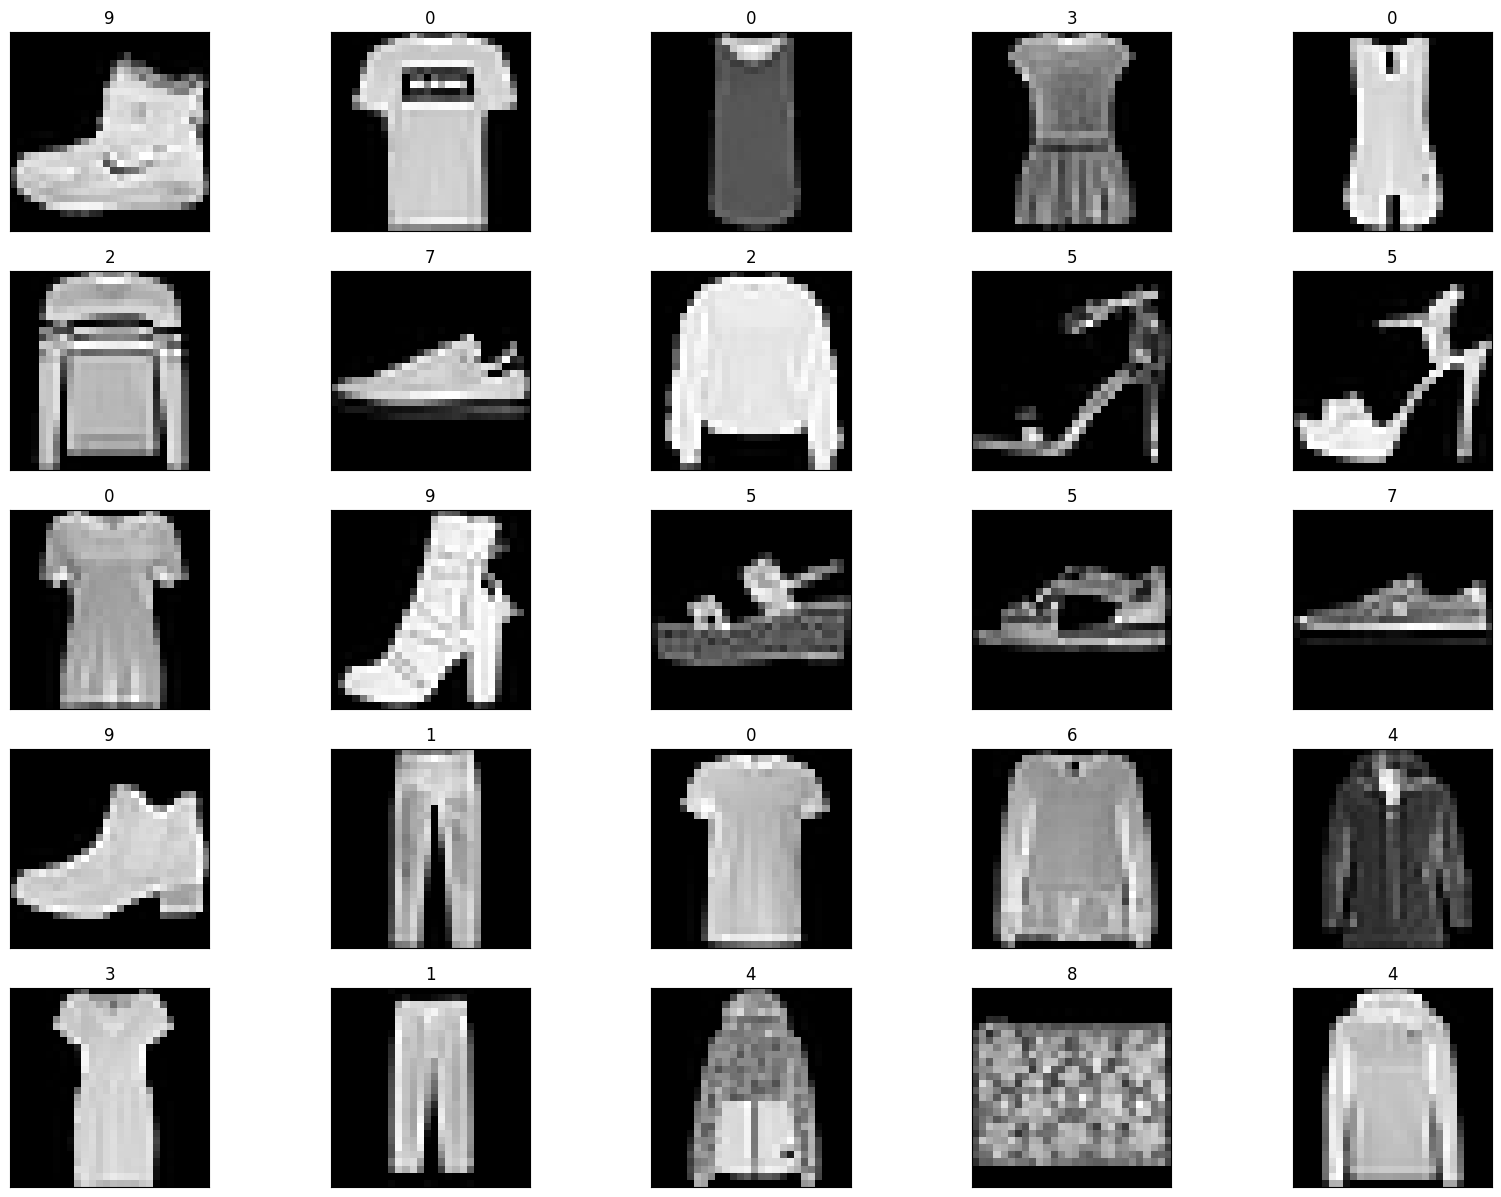

In [8]:
# Plot some images
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 15))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(y_train[i])
    # plt.tight_layout()
plt.show()

# Prepare the data for training with Keras

- Hint : Use reshape method.
- Do not forget the one hot encoding process (use the method provided from keras).

In [9]:
Rows, Cols = X_train.shape[1:]
print(f'Rows: {Rows}\nCols: {Cols}')

Rows: 28
Cols: 28


In [10]:
train_data = X_train.reshape(X_train.shape[0], Rows, Cols)
train_data = train_data.astype('float32')
print('train data shape :', train_data.shape)

test_data = X_test.reshape(X_test.shape[0], Rows, Cols)
test_data = test_data.astype('float32')
print('test data shape  :', test_data.shape)

train data shape : (60000, 28, 28)
test data shape  : (10000, 28, 28)


In [11]:
# Convert labels to categorical
train_labels_one_hot = to_categorical(y_train)
test_labels_one_hot = to_categorical(y_test)

In [12]:
print('label encoded: ',train_labels_one_hot[0])
print('label not encoded: ',y_train[0])

label encoded:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
label not encoded:  9


# Split the datasets into training and testing

- Hint : Use the training set (training and validation sets).
- Do not worry about the testing set provided from the dataset we will get with later on, do not touch it!!

In [13]:
train_size = int(len(X_train) * 0.80)
val_size = int(len(X_train) * 0.20)
print(f'Train size: {train_size}\nValidation size: {val_size}')

Train size: 48000
Validation size: 12000


In [14]:
train_data = X_train[:train_size]
val_data = X_train[train_size:]
print(f'Train data shape: {train_data.shape}\nValidation data shape: {val_data.shape}')

Train data shape: (48000, 28, 28)
Validation data shape: (12000, 28, 28)


In [15]:
train_data_labels = train_labels_one_hot[:train_size]
val_data_labels = train_labels_one_hot[train_size:]
print(f'Train data labels shape: {train_data_labels.shape}\n\
Validation data labels shape: {val_data_labels.shape}')

Train data labels shape: (48000, 10)
Validation data labels shape: (12000, 10)


# Build the CNN structure

- The model contains the following layers :-

    1 - First Conv Layer :-
    
    2 - Activation Layer
    
    3 - Pooling Layer
    
    4 - Second Conv Layer
    
    5 - Activation Layer
    
    6 - Pooling Layer
    
    7 - Third Conv Layer
    
    8 - Activation Layer
    
    9 - Pooling Layer
    
    10 - Flatten Layer
    
    11 - Dense Layer
    
    In the Conv layers we have these parameters :-
    
        a. filters : What is the number of filters of the Conv layer, make it 32 (try to change it if you want).
        b. kernel_size : The filter size of the Conv layer, make it 3 by 3 (again try to change it).
        c. input_shape : The image shape.
        d. padding : make it same.
        e. activation : make it linear (also try to change it).
    
    In the hidden layers, we have three activation layers. Search for the best activation function used in our problem, give
    your reasons why did you use it, then use it.
    
    In the Activation layers we have this parameter :-
    
        a. alpha : make it 0.1 (try to change it).
        
    In the Pooling layers we have these parameters :-
    
        a. pool_size : the pooling window size, make it 2 by 2 (try to change it).
        b. padding : make it same.
        
    In the Flatten layer, make it default, because it is basically convert the tensors into vectors.
    
    In the Dense layer we have these parameters :-
    
        a. units : the number of output labels.
        b. activation : the function that will deal with the outputs and find the probability for each one.
            Note : There are several activation functions as an output function, select the sutable for our problem.

In [16]:
def createModel():
    
    model = Sequential()
    model.add(Reshape((28, 28, 1), input_shape=(28, 28)))
    
    model.add(Conv2D(28, (3, 3), padding='same', activation='relu'))
    # 
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # 

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    # 
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # 
    
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    # 
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # 

    model.add(Flatten())
    
    model.add(Dense(512, activation='relu'))
    
    # 
    
    model.add(Dense(nClasses, activation='softmax'))
    return model

# Compile the model and examine the layers

- Find the best optimizer.
- What is the best loss function in this problem? (multi class).
- Do not forget the metric!! What is the best metric??

In [17]:
model = createModel()
batch_size = 256
epochs = 50

In [18]:
model.compile(
    optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Give me a summary of the NN

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 28)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        16192     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         7

# Plot the structure of the NN and save it as a png image.

- Hint : Use plot_model function from keras.utils

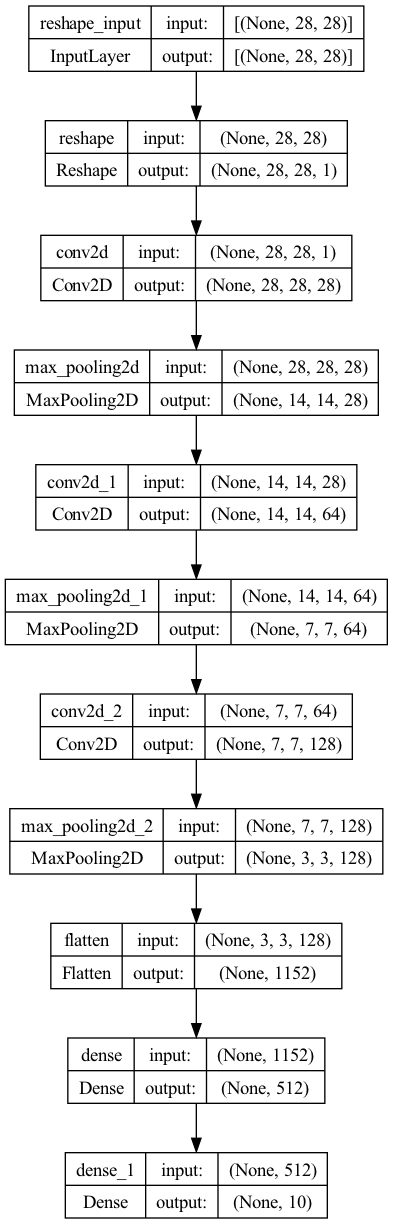

In [20]:
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

# Train the model

- The x parameter should receive the training images.
- The y parameter should receive the training labels.
- The validation_data parameter should receive the validation data (the data we use with train_test_split).
- The epochs parameter should receive the number of epochs in the model, you can make it 1 it is ok.
    Note : You can increase the epochs, this will decrease the loss, but the loss will stop decreasing in sometimes.
- Make the verbose parameter 1.

In [21]:
train_data[0].shape

(28, 28)

In [22]:
epochs = 5
result = model.fit(
    train_data, train_data_labels, batch_size=batch_size,
    epochs=epochs, verbose=1, validation_data=(val_data, val_data_labels)
)

Epoch 1/5
188/188 [==============================] - 14s 71ms/step - loss: 1.6935 - accuracy: 0.7526 - val_loss: 0.4762 - val_accuracy: 0.8362
Epoch 2/5
188/188 [==============================] - 14s 72ms/step - loss: 0.3650 - accuracy: 0.8665 - val_loss: 0.3715 - val_accuracy: 0.8640
Epoch 3/5
188/188 [==============================] - 15s 77ms/step - loss: 0.2874 - accuracy: 0.8933 - val_loss: 0.3179 - val_accuracy: 0.8868
Epoch 4/5
188/188 [==============================] - 14s 76ms/step - loss: 0.2421 - accuracy: 0.9100 - val_loss: 0.3509 - val_accuracy: 0.8714
Epoch 5/5
188/188 [==============================] - 14s 76ms/step - loss: 0.2123 - accuracy: 0.9217 - val_loss: 0.2863 - val_accuracy: 0.9046


# Evaluate the model on the test data

- Use evaluate function to find the performance of the model.
- The x parameter should receive the testing images (the testing images we get from the dataset).
- The y parameter should receive the testing labels.
- You need to print the metric you choose before and the loss values.

In [23]:
model.evaluate(test_data, test_labels_one_hot)

313/313 [==============================] - 2s 5ms/step - loss: 0.3139 - accuracy: 0.9018


[0.3138750195503235, 0.9017999768257141]

In [24]:
# make floating point 3 digits
print(f'{(max(result.history["accuracy"])*100):.3f}' + "%")

92.173%


# Make predictions on the test data

- Just print the first ten predictions and compare them with the actual values.

In [25]:
predections = model.predict(test_data)

313/313 [==============================] - 2s 5ms/step


In [27]:
predections = [np.argmax(x) for x in predections]
Actual = [np.argmax(x) for x in test_labels_one_hot]
predections[:10]

[9, 2, 1, 1, 6, 1, 4, 6, 5, 7]

In [31]:
# - Just print the first ten predictions and compare them with the actual values.
print(f'Predictions:\n{predections[:10]}')
print(f'Actual:\n{Actual[:10]}')

Predictions:
[9, 2, 1, 1, 6, 1, 4, 6, 5, 7]
Actual:
[9, 2, 1, 1, 6, 1, 4, 6, 5, 7]


# Visualize the predictions for several examples (25 is enough).

- For each image, print the image with the actual value and predicted value.

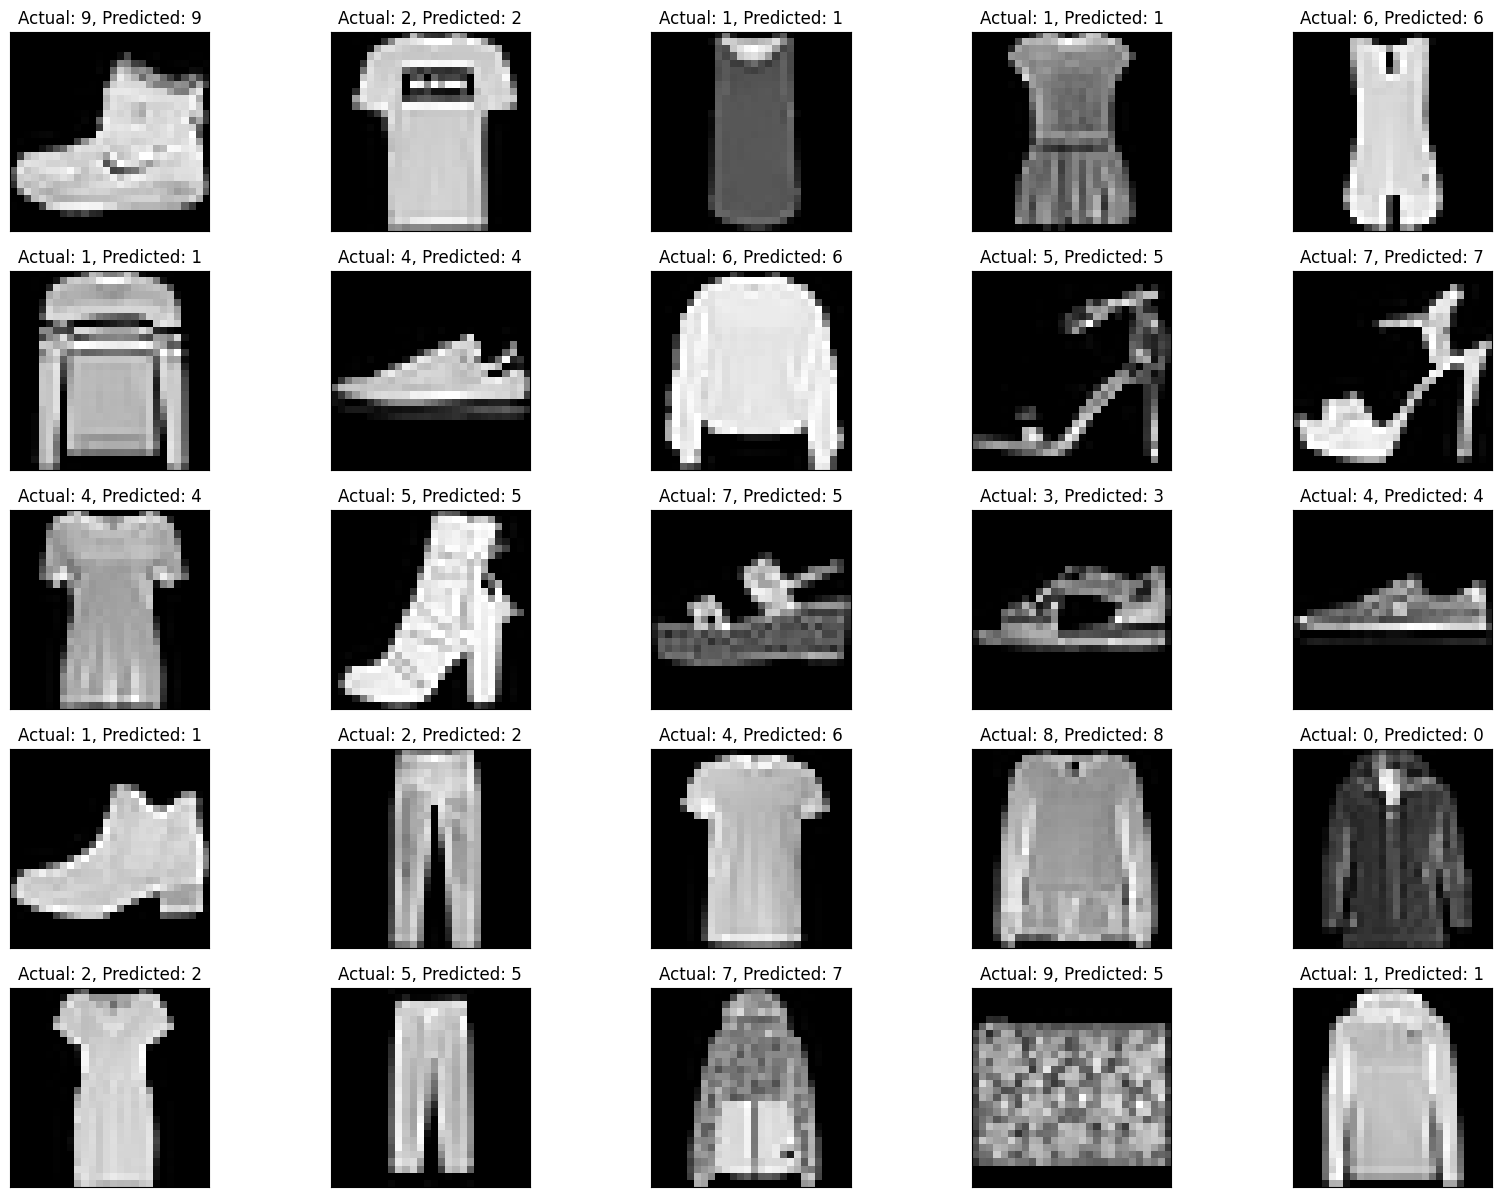

In [32]:
# Plot some images
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 15))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'Actual: {Actual[i]}, Predicted: {predections[i]}')
    # plt.tight_layout()
plt.show()

# Save the model as pickle file

In [30]:
import pickle
pickle.dump(model, open("NN_fashion.pkl", "wb"))